In [1]:
%pylab inline
import galsim
import numpy as np
import astropy.io.fits as pyfits

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd wrkDir/FPFS2/sim

/home/xiangchong/work/gw_ipmu/work/FPFS2/sim


+ This notebook test the code to transform from correlation function to power spectrum.
+ power spectrum reduces to power function if we use zero-padding.

In [3]:
# PSF preparation
ifield=1
psfPre='psfPre'
# Basic parameters
ngrid       =   64
nrot        =   4
nx          =   nrot 
ny          =   1
ndata       =   nx*ny
scale       =   0.168
ngridTot    =   ngrid*nx
bigfft      =   galsim.GSParams(maximum_fft_size=10240)
flux_scaling=   2.587

# Get the psf and nosie information 
psfFname    =   os.path.join(psfPre,'psf%04d.fits'%(ifield))
psfImg      =   galsim.fits.read(psfFname)
noiseHead   =   pyfits.getheader(psfFname)
psfInt      =   galsim.InterpolatedImage(psfImg,scale=scale,flux = 1.) 
# Get the shear information
g1          =   noiseHead['g1']
g2          =   noiseHead['g2']
fwhm        =   noiseHead['fwhm'] 
variance    =   noiseHead['var']
rescale     =   noiseHead['rescale']
ud          =   galsim.UniformDeviate(ifield*10000+1)
np.random.seed(ifield*10000+1)

In [4]:
corPre='corPre'
corFname    =   os.path.join(corPre,'correlation.fits')
corNoise    =   galsim.getCOSMOSNoise(file_name=corFname,rng=ud,cosmos_scale=scale,variance=variance)

In [18]:
noi2Mea=np.zeros((ngrid,ngrid))
noiPMea=np.zeros((ngrid,ngrid))
num=0
for i in range(1000):
    noi_image   =   galsim.ImageF(ngrid,ngrid,scale=scale)
    corNoise.applyTo(noi_image)
    noi_array=noi_image.array
    noiPMea+=np.abs(np.fft.fft2(noi_array))**2.
    noi2Mea+=(np.fft.fft2(noi_array)**2.).real
    num+=1

0.008904292669705138
13.839260036352677


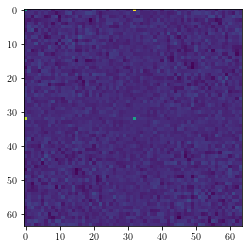

In [19]:
noi2Mea=noi2Mea/num
noiPMea=noiPMea/num
print(np.average(noi2Mea))
print(np.average(noiPMea))
plt.imshow(noi2Mea)

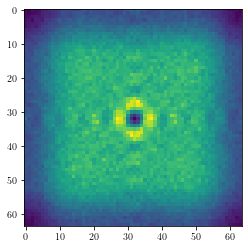

In [20]:
plt.imshow(np.fft.fftshift(noiPMea))

In [21]:
resMea=np.zeros((ngrid,ngrid))
num=0
for i in range(1000):
    noi_image   =   galsim.ImageF(ngrid,ngrid,scale=scale)
    corNoise.applyTo(noi_image)
    noi_array=noi_image.array
    resMea+=(np.abs(np.fft.fft2(noi_array))**2.-noiPMea)**2.
    num+=1

In [22]:
resMea/=num

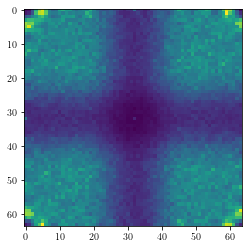

In [23]:
plt.imshow(resMea)